# LLE (Locally Linear Embedding)
- 데이터 포인트를 근접한이웃과 선형 결합으로 표현하고 이를 유지하도록 저차원 공간에 매핑

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name() # 한글 폰트 이름 가져오기
matplotlib.rc('font', family=font) # 한글 폰트 사용 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 사용 설정

In [9]:
from sklearn.datasets import load_iris
from sklearn.manifold import LocallyLinearEmbedding

# LocallyLinearEmbedding은 데이터의 구조를 저차원 공간에 잘 보존하면서 차원을 줄여주는 기법(LLE, Locally Linear Embedding)을 사용할 수 있게 해주는 사이킷런(sklearn)의 모듈입니다.
# 쉽게 말해, 복잡한 데이터를 2차원이나 3차원처럼 더 단순하게 만들어서 시각화하거나 분석하기 쉽게 도와줍니다.

iris_data = load_iris()

# 국소 선형 임베딩(LLE)은 데이터의 구조를 저차원 공간에 잘 보존하면서 차원을 줄여주는 기법입니다.
# 이 기법은 각 데이터 포인트를 근접한 이웃들과의 선형 결합으로 표현하고, 이를 유지하도록 저차원 공간에 매핑합니다.
# 이 기법은 데이터의 구조를 잘 보존하면서 차원을 줄이는 데 효과적입니다.

# n_components : 차원 축소 후 차원 수, n_neighbors : 이웃 데이터 수
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
iris_lle = lle.fit_transform(iris_data.data)
# iris_lle.shape (150, 2)

iris_lle_df = pd.DataFrame(iris_lle, columns=['lle_col1', 'lle_col2'])
iris_lle_df['target'] = iris_data.target

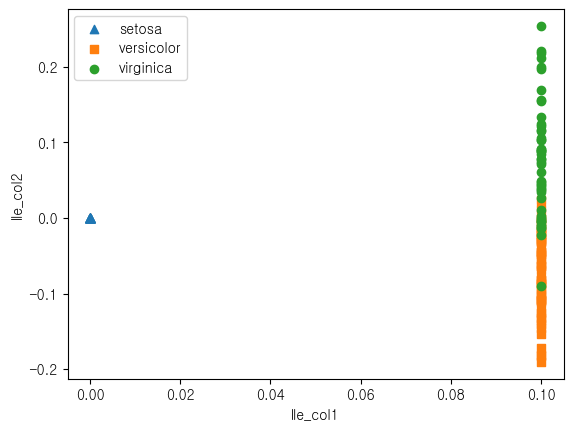

In [10]:
# 축소한 차원으로 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    X = iris_lle_df[iris_lle_df['target'] == i]['lle_col1']
    y = iris_lle_df[iris_lle_df['target'] == i]['lle_col2']
    plt.scatter(X, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lle_col1')
plt.ylabel('lle_col2')
plt.show()

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# LinearRegression에는 max_iter 파라미터가 없습니다. max_iter는 LogisticRegression 등에서 사용됩니다.
lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, iris_lle_df[['lle_col1', 'lle_col2']], iris_lle_df['target'], cv=3)
result


{'fit_time': array([0.01047587, 0.00525379, 0.00420403]),
 'score_time': array([0.00199962, 0.00099945, 0.00099778]),
 'test_score': array([0.94, 0.9 , 0.9 ])}

In [21]:
print(lle.n_neighbors)
print(lle.n_components)
print(lle.reconstruction_error_) # 재구성 오차, 차원 축소 후 차원 복원 오차

10
2
5.1168977786832e-07
